## Описание датасета
Потребление мяса было важной частью рациона человека на протяжении тысячелетий, обеспечивая богатый источник белка и питательных веществ.Однако количество и виды потребляемого мяса сильно различались в разных культурах и исторических периодах.Чтобы лучше понять особенности потребления мяса потребление мяса во всем мире с течением времени, был составлен набор данных, который включает информацию об историческом потреблении мяса в различных регионах и странах.

In [2]:
import pandas as pd
import numpy as np

filename = '/Users/kovalenkov/Documents/Бауманка/3 курс/6 семестр/ТМО/Machine_learning_technologies/meat_consumption.csv'
ds = pd.read_csv(filename)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
ds.columns = ['Локация', 'Индикатор', 'Тип мяса' , 'Количество', 'Категория', 'Год', 'Значение']
ds = pd.DataFrame(ds)
display(ds)

,Локация,Индикатор,Тип мяса,Количество,Категория,Год,Значение
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.00
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.81
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.28
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.24
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.54
...,...,...,...,...,...,...,...
12135,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2024,732.15
12136,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2025,737.01
12137,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2026,741.10
12138,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2027,743.49


В датасете не содержится пустых данных.
Кодирование категориальных признаков было сделано с помощью Label Encoder.
Данный тип кодирования является наиболее часто используемым, преобразование представляет собой однозначное соответствие число <-> уникальное значение категориального признака. 

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ds['Тип мяса'] = labelencoder.fit_transform(ds['Тип мяса'].values)
ds['Индикатор'] = labelencoder.fit_transform(ds['Индикатор'].values)
ds['Категория'] = labelencoder.fit_transform(ds['Категория'].values)
ds['Количество'] = labelencoder.fit_transform(ds['Количество'].values)
ds['Локация'] = labelencoder.fit_transform(ds['Локация'].values)
display(ds)

,Локация,Индикатор,Тип мяса,Количество,Категория,Год,Значение
0,1,0,0,0,0,1990,0.00
1,1,0,0,0,0,1991,27.81
2,1,0,0,0,0,1992,26.28
3,1,0,0,0,0,1993,26.24
4,1,0,0,0,0,1994,25.54
...,...,...,...,...,...,...,...
12135,11,0,3,1,0,2024,732.15
12136,11,0,3,1,0,2025,737.01
12137,11,0,3,1,0,2026,741.10
12138,11,0,3,1,0,2027,743.49


### С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Размер тестовой и обучающей выборки 1 к 2.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(ds,train_size=0.67, random_state=42)

print(f"Обучающая выборка:\n{X_train}")
print(f"Тестовая выборка:\n{X_test}")

Обучающая выборка:
       Локация  Индикатор  Тип мяса  Количество  Категория   Год  Значение
9713        37          0         3           1          0  2020  15301.95
8165        27          0         3           1          0  1993     26.91
7877         0          0         0           1          0  2017   2507.00
9885        38          0         1           1          0  1997    129.95
10586       37          0         2           1          0  1996  46260.26
...        ...        ...       ...         ...        ...   ...       ...
11964       12          0         3           0          0  2009      4.92
5191        11          0         1           0          0  2022     35.21
5390        25          0         2           0          0  2026     31.53
860         24          0         2           0          0  1992     15.30
7270        36          0         3           1          0  1995      4.17

[8133 rows x 7 columns]
Тестовая выборка:
       Локация  Индикатор  Тип мяса  К

In [55]:
from sklearn.neighbors import KNeighborsClassifier 
predictors = ['Локация', 'Категория'] 
outcome = 'Количество' 
print(X_train)

new_record = X_train.loc[:, predictors] 
X = X_train.loc[1:, predictors] 
y = X_train.loc[1:, outcome] 

kNN = KNeighborsClassifier(n_neighbors=20) 
kNN.fit(X, y) 
kNN.predict(new_record)
print(kNN.predict_proba(new_record)) 

       Локация  Индикатор  Тип мяса  Количество  Категория   Год  Значение
9713        37          0         3           1          0  2020  15301.95
8165        27          0         3           1          0  1993     26.91
7877         0          0         0           1          0  2017   2507.00
9885        38          0         1           1          0  1997    129.95
10586       37          0         2           1          0  1996  46260.26
...        ...        ...       ...         ...        ...   ...       ...
11964       12          0         3           0          0  2009      4.92
5191        11          0         1           0          0  2022     35.21
5390        25          0         2           0          0  2026     31.53
860         24          0         2           0          0  1992     15.30
7270        36          0         3           1          0  1995      4.17

[8133 rows x 7 columns]
[[0.7  0.3 ]
 [0.6  0.4 ]
 [0.45 0.55]
 ...
 [0.45 0.55]
 [0.6  0.4 ]
 [0.5

### Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели.
Используйте не менее двух стратегий кросс-валидации.

In [16]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         ds, ds['Локация'], cv=3)
print(scores)

[0.27378305 0.21126761 0.17498764]


Значение метрики accuracy для 3 фолдов

In [11]:
np.mean(scores)

0.8339377408545651

Усредненное значение метрики accuracy для 3 фолдов

In [17]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         ds, ds['Локация'], cv=3,
                        scoring='f1_weighted')
print(scores, np.mean(scores))

[0.26692239 0.20562052 0.17863725] 0.21706005353021074


Использование метрики f1

In [20]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        ds, ds['Локация'], scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00640798, 0.00781107, 0.00803304]),
 'score_time': array([0.10710096, 0.15897202, 0.16736889]),
 'test_precision': array([0.33010929, 0.22315103, 0.20495232]),
 'train_precision': array([0.85534386, 0.90023732, 0.94270171]),
 'test_recall': array([0.27378305, 0.21126761, 0.17498764]),
 'train_recall': array([0.8480168 , 0.89682442, 0.94131455]),
 'test_f1': array([0.26692239, 0.20562052, 0.17863725]),
 'train_f1': array([0.84726898, 0.89641442, 0.94118126])}

В отличие от функции cross_val_score, функция cross_validate позволяет использовать для оценки несколько метрик и возращает более детальную информацию.

##### Стратегия K-fold

Данная стратегия работает в соответствии с определением кросс-валидации.

Каждой стратегии в scikit-learn ставится в соответствии специальный класс-итератор, который может быть указан в качестве параметра cv функций cross_val_score и cross_validate.

In [21]:
from sklearn.model_selection import KFold
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


Далее итератор может быть использован в функциях cross_val_score и cross_validate:

In [23]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         ds, ds['Локация'], scoring='f1_weighted', 
                         cv=kf)
print(scores)

[0.15311171 0.13647194 0.10800428 0.13971723 0.12446281]


In [24]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                       ds, ds['Локация'], scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is 

{'fit_time': array([0.01108813, 0.00729704, 0.01269603, 0.00825405, 0.00961161]),
 'score_time': array([0.06818795, 0.06709313, 0.08138776, 0.08531499, 0.08978724]),
 'test_precision': array([0.46862436, 0.29006464, 0.21143049, 0.34004254, 0.16902537]),
 'train_precision': array([0.87083679, 0.87056821, 0.89995913, 0.92913181, 0.915602  ]),
 'test_recall': array([0.11861614, 0.12479407, 0.07825371, 0.11490939, 0.10955519]),
 'train_recall': array([0.86655684, 0.86521829, 0.89363674, 0.92637974, 0.9134061 ]),
 'test_f1': array([0.15311171, 0.13647194, 0.10800428, 0.13971723, 0.12446281]),
 'train_f1': array([0.86588585, 0.86452674, 0.89392474, 0.92631311, 0.91306137])}

##### Leave One Out (LOO)

In [25]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
X = range(12)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


В тестовую выборку помещается единственный элемент (One Out). Количество фолдов в этом случае определяется автоматически и равняется количеству элементов.

Данный метод более ресурсоемкий чем KFold.

Существует эмпирическое правило, что вместо Leave One Out лучше использовать KFold на 5 или 10 фолдов.

### Grid Search (решетчатый поиск)

In [26]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    ds, ds['Локация'], test_size=0.5, random_state=1)

clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [58]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00628695, 0.00453119, 0.00473919, 0.00434484, 0.00475979,
        0.00469732, 0.00469728, 0.00478139, 0.00498343, 0.00439696]),
 'std_fit_time': array([0.00101189, 0.00020343, 0.00076725, 0.00019757, 0.00032777,
        0.00032818, 0.00045276, 0.00038913, 0.00068028, 0.000266  ]),
 'mean_score_time': array([0.04920111, 0.03121157, 0.03213878, 0.03319583, 0.03541555,
        0.03615222, 0.0367352 , 0.04176722, 0.03923354, 0.041994  ]),
 'std_score_time': array([0.01696428, 0.00068079, 0.00103522, 0.00075006, 0.00184854,
        0.00109733, 0.00065719, 0.00571699, 0.00191078, 0.00325244]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neig

Лучшая модель

In [59]:
clf_gs.best_estimator_

KNeighborsClassifier()

Лучшее значение метрики

In [60]:
clf_gs.best_score_

0.47990115321252064

Лучшее значение параметров

In [61]:
clf_gs.best_params_

{'n_neighbors': 5}

Изменение качества на тестовой выборке в зависимости от К-соседей

Matplotlib is building the font cache; this may take a moment.


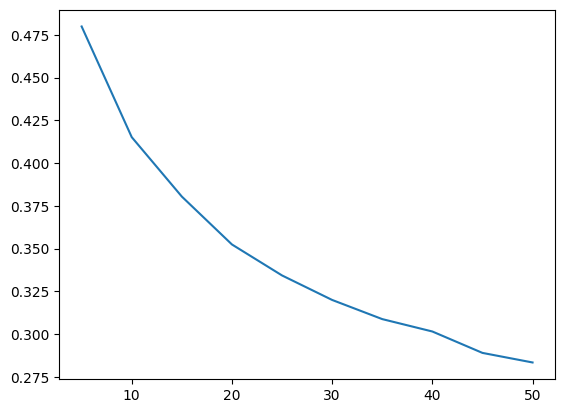

In [63]:
import matplotlib.pyplot as plt
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

##### Сравните метрики качества исходной и оптимальной моделей.

Строится зависимость метрики на обучающей выборке от размера выборки.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

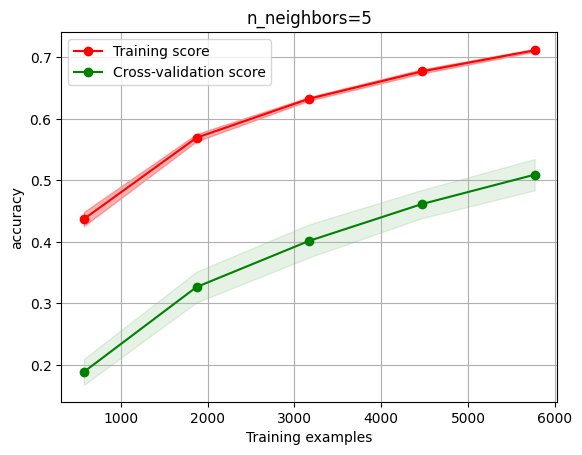

In [68]:
from sklearn.model_selection import learning_curve, validation_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X_train, y_train, cv=20)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

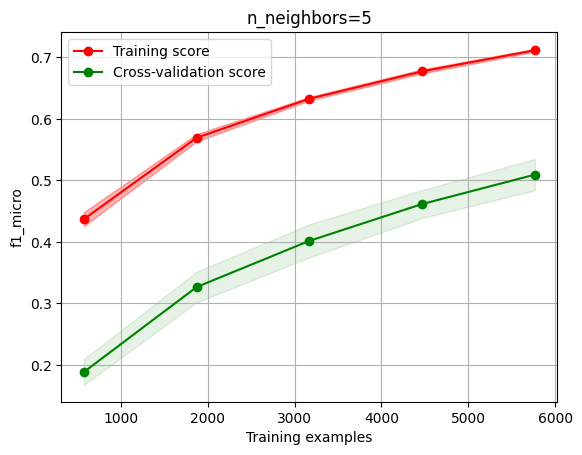

In [69]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X_train, y_train, cv=20, scoring='f1_micro')

### Построение кривой валидации - validation_curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

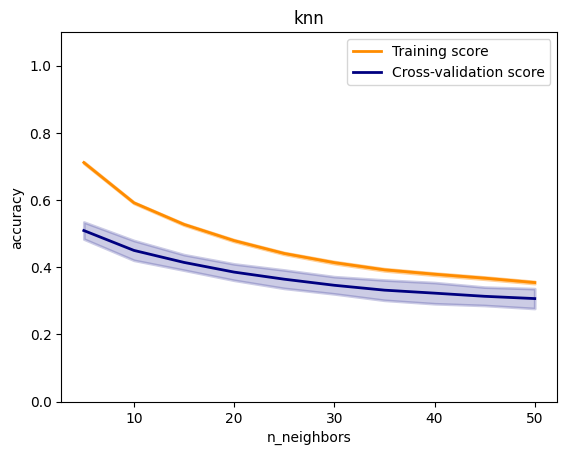

In [71]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

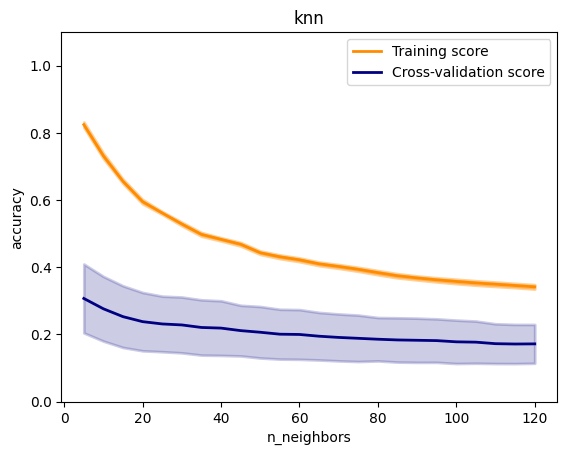

In [73]:
n_range2 = np.array(range(5,125,5))
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      ds, ds['Локация'], 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")